In [1]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt

In [2]:
X = np.c_[(0, 0),
          (1, 1),
          #---
          (1, 0),
          (0, 1)].T
Y = [0] * 2 + [1] * 2

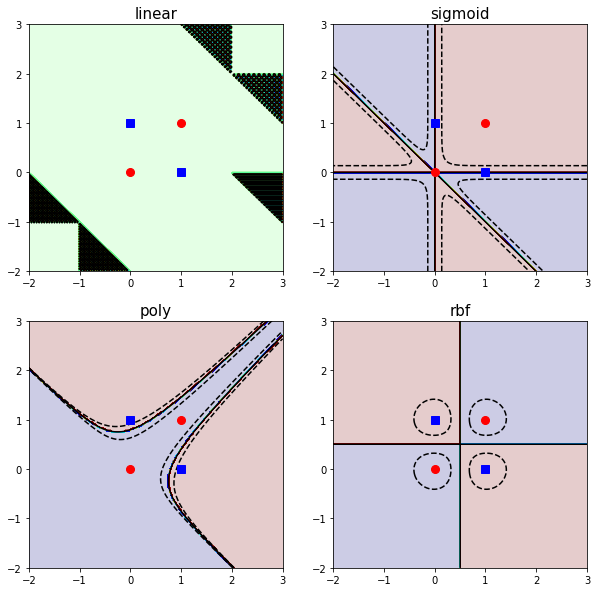

In [3]:
plt.figure(figsize=(10,10))
for index,kernel in enumerate(['linear','sigmoid','poly','rbf']):
    model=svm.SVC(kernel=kernel,gamma=4,coef0=0)
    model.fit(X,Y)
    plt.subplot(2,2,index+1)
    
    #plt.model()
    
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=40)
    
    plt.plot(X[:2,0],X[:2,1],'ro',markersize=8)
    plt.plot(X[2:,0],X[2:,1],'bs',markersize=8)
    
    x_min, x_max = -2, 3
    y_min, y_max = -2, 3

    #create all data point in plot with x in [x_min:x_max:200j], y in [y_min:y_max:200j]
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
plt.savefig('result.png')    
plt.show()